In [2]:
import numpy as np
import seaborn as sns

# Generating a Synthetic Dataset for Model Application

This Python code generates a synthetic dataset with 1000 samples and 2 features using the make_blobs function from scikit-learn. It creates three clusters with specified centers, standard deviation, and random state. The resulting dataset is visualized with a scatter plot using Matplotlib, showcasing the distribution of points in a 2D space. The code provides a quick and visual way to understand the generated synthetic data for initial model exploration.

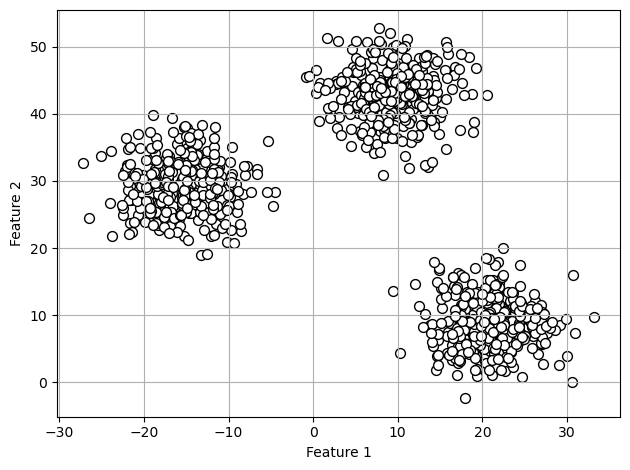

In [8]:
>>> from sklearn.datasets import make_blobs
>>> X, y = make_blobs(n_samples=1000,
... n_features=2,
... centers=3,
... center_box=(-100.0, 100.0),
... cluster_std=4,
... shuffle=True,
... random_state=0)
>>> import matplotlib.pyplot as plt
>>> plt.scatter(X[:, 0],
... X[:, 1],
... c='white',
... marker='o',
... edgecolor='black',
... s=50)
>>> plt.xlabel('Feature 1')
>>> plt.ylabel('Feature 2')
>>> plt.grid()
>>> plt.tight_layout()
>>> plt.show()

# A KMeans clustering model has been developed using only the NumPy module. In this implementation, Euclidean distance is employed, and subsequent optimization is performed based on the mean distances. The model leverages NumPy's capabilities to efficiently handle mathematical operations.

In [9]:
def kmeans(X, n_cluster, rang=0.5, show_iter=False):
    m=np.random.normal(np.mean(X),np.std(X), (n_cluster,X.shape[1]))
    def clus(X, m):
        mega=[]
        teta= [[] for _ in range(n_cluster)]
        for i in range(len(m)):
            mega.append(np.sum(((X-m[i])**2)**0.5, axis=1))
        for i in range(len(X)):
            dd=[]
            for s in range(len(m)):
                dd.append(mega[s][i])
            tt=np.where(np.min(dd)==dd)
            teta[tt[0][0]].append(X[i])
        return teta
    def optinal(teta):
        m1=np.full((len(teta),X.shape[1]),0, dtype=float)
        for i in range(len(teta)):
            if bool(teta[i]):
                m1[i]=np.mean(np.array(teta[i]), axis=0)
            else:
                m1[i]=np.random.normal(np.mean(X),np.std(X), X.shape[1])
        return m1
    teta=clus(X,m)
    m1=optinal(teta)
    teta=clus(X,m1)
    m2=optinal(teta)
    iter=1
    print('iter', iter)
    while sum(sum((m1-m2)**2))>rang:
        teta=clus(X,m1)
        m1=optinal(teta)
        teta=clus(X,m1)
        m2=optinal(teta)
        iter+=1
        if show_iter:
            print('iter', iter)
    last=[teta, m, m2]
    return last

The function kmeans takes a dataset X and the desired number of clusters n_cluster as input, utilizing the KMeans algorithm. The variable rang defines the convergence threshold, and show_iter toggles the display of iteration information. The function iteratively refines cluster assignments and centroids, returning a list containing the final cluster assignments (teta), initial centroids (m), and optimized centroids (m2). The convergence is determined by the squared difference between consecutive centroid sets falling below the specified threshold. If show_iter is set to True, the function provides iteration details.

# Model Fit 

In [18]:
km=kmeans(X,3,0, show_iter=True)
teta=km[0]

iter 1
iter 2
iter 3
iter 4
iter 5


In [51]:
%matplotlib

Using matplotlib backend: nbAgg


# Output Visualization

<IPython.core.display.Javascript object>


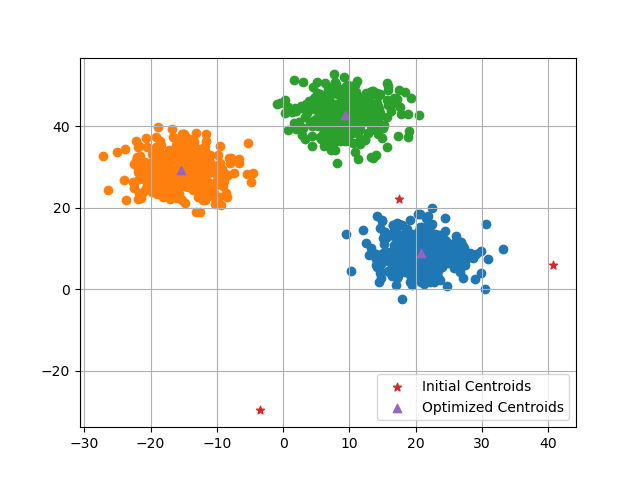

In [52]:
for i in range(len(teta)):
     plt.scatter(np.array([item[0] for item in teta[i]]), np.array([item[1] for item in teta[i]]))
plt.scatter(np.asarray(km[1])[:, 0], np.asarray(km[1])[:, 1], marker='*', label='Initial Centroids')
plt.scatter(np.asarray(km[2])[:, 0], np.asarray(km[2])[:, 1], marker='^', label='Optimized Centroids')
plt.grid()
plt.legend()
plt.show()

This code snippet visualizes the clustered data points from the teta variable, where each cluster is represented by distinct markers. Additionally, it marks the initial centroids (km[1]) with asterisks and the optimized centroids (km[2]) with caret symbols. The scatter plot provides a clear depiction of the clustering results and the movement of centroids during the optimization process.

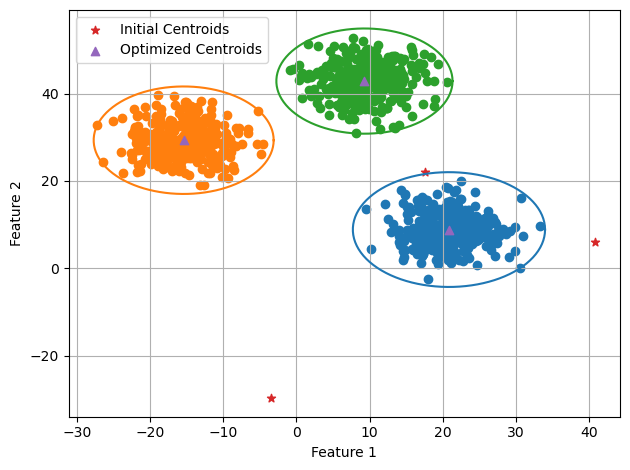

In [30]:
for i in range(len(teta)):
     plt.scatter(np.array([item[0] for item in teta[i]]), np.array([item[1] for item in teta[i]]))
plt.scatter(np.asarray(km[1])[:, 0], np.asarray(km[1])[:, 1], marker='*', label='Initial Centroids')
plt.scatter(np.asarray(km[2])[:, 0], np.asarray(km[2])[:, 1], marker='^', label='Optimized Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.tight_layout()
for i in range(len(teta)):
    d=np.array(km[0][i])-km[2][i]
    radius=np.max((d[:,0]**2+d[:,1]**2)**0.5)
    r = radius
    theta = np.linspace(0, 2*np.pi, 100)
    x = km[2][i,0]+r * np.cos(theta)
    y = km[2][i,1]+r * np.sin(theta)
    plt.plot(x, y, label=r'$x^2 + y^2 = r^2$')
plt.show()

# Utilizing scikit-learn for KMeans Clustering on Synthetic Data

This code showcases the implementation of KMeans clustering using scikit-learn's KMeans module on a synthetic dataset (X). The model is configured with three clusters, random initialization, ten initializations, a maximum of 300 iterations, and a tolerance of 1e-04. The resulting cluster assignments are stored in the variable y_km after fitting the model to the dataset.

In [15]:
>>> from sklearn.cluster import KMeans
>>> km = KMeans(n_clusters=3,
... init='random',
... n_init=10,
... max_iter=300,
... tol=1e-04,
... random_state=0)
>>> y_km = km.fit_predict(X)

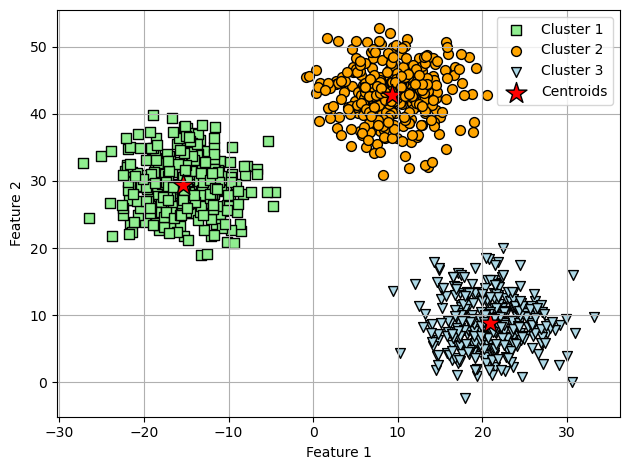

In [16]:
>>> plt.scatter(X[y_km == 0, 0],
... X[y_km == 0, 1],
... s=50, c='lightgreen',
... marker='s', edgecolor='black',
... label='Cluster 1')
>>> plt.scatter(X[y_km == 1, 0],
... X[y_km == 1, 1],
... s=50, c='orange',
... marker='o', edgecolor='black',
... label='Cluster 2')
>>> plt.scatter(X[y_km == 2, 0],
... X[y_km == 2, 1],
... s=50, c='lightblue',
... marker='v', edgecolor='black',
... label='Cluster 3')
>>> plt.scatter(km.cluster_centers_[:, 0],
... km.cluster_centers_[:, 1],
... s=250, marker='*',
... c='red', edgecolor='black',
... label='Centroids')
>>> plt.xlabel('Feature 1')
>>> plt.ylabel('Feature 2')
>>> plt.legend(scatterpoints=1)
>>> plt.grid()
>>> plt.tight_layout()
>>> plt.show()

# Evaluating Clustering Effectiveness on the Iris Dataset Without Target Labels

Note

I have executed the code on the Iris dataset for code validation, specifically to gauge the effectiveness of clustering. It is acknowledged that clustering was performed without the use of a target variable. The analysis was conducted solely to assess the clustering performance, emphasizing the evaluation of the outcome without the reliance on a designated target variable for classification

In [1071]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [1088]:
iris=load_iris()
X=iris.data
y=iris.target

In [1089]:
teta=kmeans(X, 3, 0)
teta=teta[0]

In [1090]:
target=np.zeros(X.shape[0])
a, b,c=0, 0, 0
for i in range(target.shape[0]):
    if a < len(teta[1]) and np.array_equal(teta[1][a], X[i]):
        target[i] = 0
        a += 1
    elif b < len(teta[2]) and np.array_equal(teta[2][b], X[i]):
        target[i] = 2
        b += 1
    elif c < len(teta[0]) and np.array_equal(teta[0][c], X[i]):
        target[i] = 1
        c += 1

In [1091]:
accuracy_score(y, target)

0.8866666666666667